In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
print(len(tfds.list_builders()))

413


In [3]:
data, info = tfds.load('tf_flowers', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='C:\\Users\\euiso\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [4]:
data.keys()

dict_keys(['train'])

In [5]:
print(info.features['label'].names)

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [6]:
ds_train = data['train']
print(len(ds_train))

3670


In [7]:
ds_train = ds_train.map(lambda x:(tf.image.resize(x['image'], (224, 224)), x['label']))
ds_train =ds_train.shuffle(700).batch(3670)
batch = next(iter(ds_train))
print(batch[0].shape, type(batch[0]), batch[1].shape, type(batch[1]))

(3670, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (3670,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [8]:
images, labels = batch
print(images.shape, type(images), labels.shape, type(labels))

(3670, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (3670,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [9]:
from tensorflow.keras.utils import to_categorical

images = np.array(images) / 255
labels = np.array(labels)

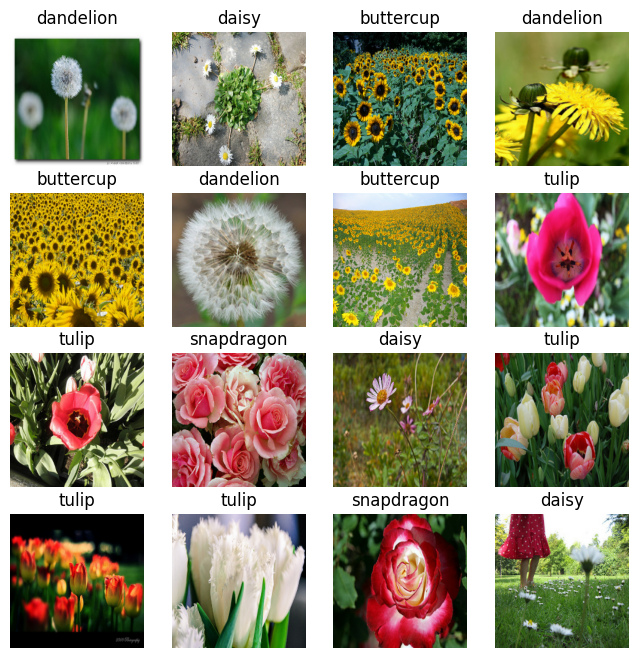

In [10]:
import matplotlib.pyplot as plt
import random

class_names = {
    0 : 'dandelion',
    1 : 'daisy', 
    2 : 'tulip',
    3 : 'buttercup',
    4 : 'snapdragon'
}

plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, len(images), size=16)

for i, idx in enumerate(random_idx) :
    img = images[idx]
    label_idx = labels[idx]
    label = class_names[label_idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.show()


In [11]:
x_train = images[:-700]
y_train = labels[:-700]
x_test = images[-700 :]
y_test = labels[-700 :]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2970, 224, 224, 3) (2970,) (700, 224, 224, 3) (700,)


In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn=Sequential()

cnn.add(Conv2D(32,(3,3),activation='relu', padding='same',input_shape=(224, 224,3)))
cnn.add(Conv2D(32,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(Conv2D(64,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(256,(3,3),activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(5,activation='softmax'))

cnn.summary()




c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,581 (8.35 MB)

 Trainable params: 2,188,581 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam

# 옵티마이저 초기화
# optimizer = Adam(learning_rate=0.001)

cnn.compile(optimizer=Adam(learning_rate= 2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 60s 632ms/step - accuracy: 0.1830 - loss: 1.6181 - val_accuracy: 0.1586 - val_loss: 1.6099
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 676ms/step - accuracy: 0.1978 - loss: 1.6083 - val_accuracy: 0.1857 - val_loss: 1.6090
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 700ms/step - accuracy: 0.2188 - loss: 1.6019 - val_accuracy: 0.2386 - val_loss: 1.6082
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 64s 686ms/step - accuracy: 0.2262 - loss: 1.6027 - val_accuracy: 0.2457 - val_loss: 1.6076
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 676ms/step - accuracy: 0.2395 - loss: 1.5961 - val_accuracy: 0.2643 - val_loss: 1.6069
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 678ms/step - accuracy: 0.2427 - loss: 1.5969 - val_accuracy: 0.2700 - val_loss: 1.6062
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 63s 680ms/step - accuracy: 0.2266 - loss: 1.5979 - val_accuracy: 0.2800 - val_loss: 1.6057
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 64s 683ms/step - accuracy: 0.2670 - loss: 1.5920 - val_accu

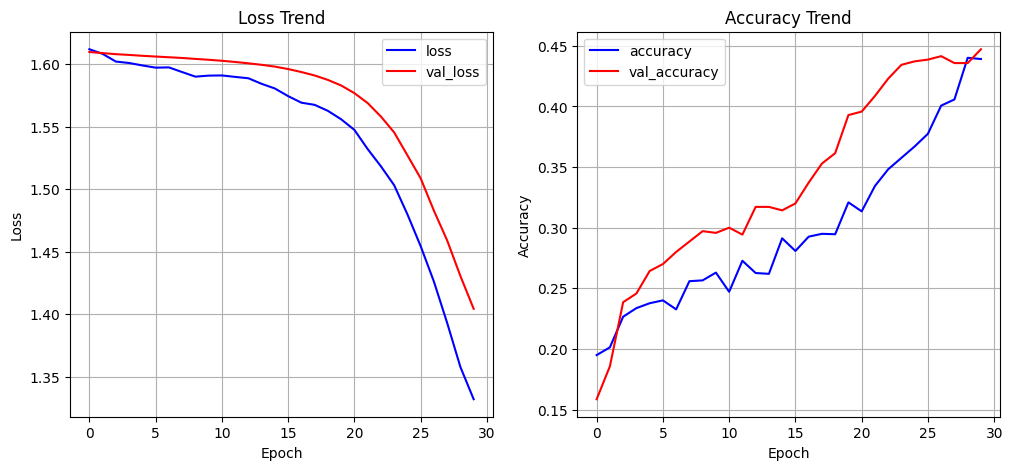

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [16]:
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3, VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224,3))

In [17]:
model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))                  
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.optimizers import Adam

# 옵티마이저 초기화
# optimizer = Adam(learning_rate=0.001)

cnn.compile(optimizer=Adam(learning_rate= 2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 69s 716ms/step - accuracy: 0.4483 - loss: 1.3154 - val_accuracy: 0.4529 - val_loss: 1.3883
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 704ms/step - accuracy: 0.4412 - loss: 1.2937 - val_accuracy: 0.4529 - val_loss: 1.3735
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 703ms/step - accuracy: 0.4655 - loss: 1.2708 - val_accuracy: 0.4586 - val_loss: 1.3599
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 702ms/step - accuracy: 0.4580 - loss: 1.2695 - val_accuracy: 0.4586 - val_loss: 1.3480
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 66s 710ms/step - accuracy: 0.4495 - loss: 1.2930 - val_accuracy: 0.4686 - val_loss: 1.3377
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 702ms/step - accuracy: 0.4441 - loss: 1.2723 - val_accuracy: 0.4629 - val_loss: 1.3321
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 699ms/step - accuracy: 0.4486 - loss: 1.2368 - val_accuracy: 0.4700 - val_loss: 1.3214
Epoch 8/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 65s 698ms/step - accuracy: 0.4468 - loss: 1.2731 - val_accu

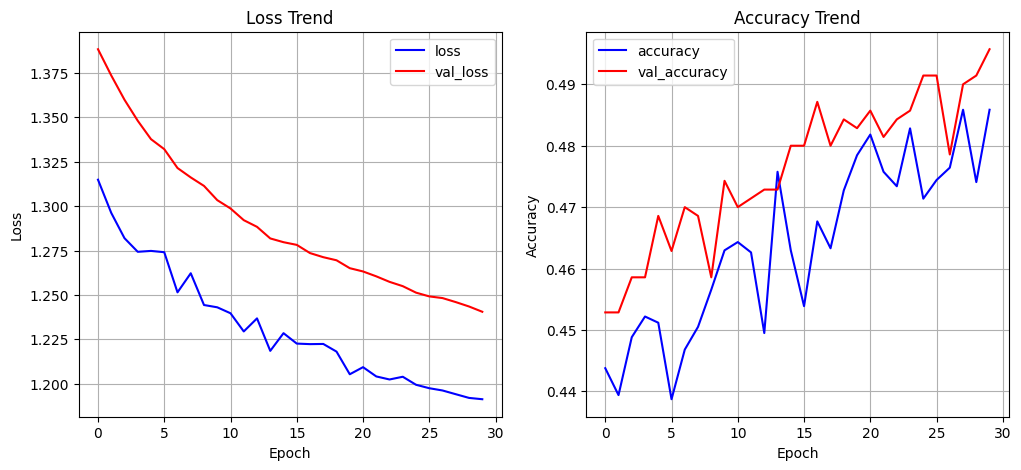

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [20]:
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3, VGG16

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224,3))

In [21]:
from tensorflow.keras.optimizers import Adam

# 옵티마이저 초기화
# optimizer = Adam(learning_rate=0.001)

cnn.compile(optimizer=Adam(learning_rate= 1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 54s 695ms/step - accuracy: 0.3437 - loss: 1.6327 - val_accuracy: 0.3754 - val_loss: 1.3199
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 692ms/step - accuracy: 0.4072 - loss: 1.3425 - val_accuracy: 0.4512 - val_loss: 1.2887
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 687ms/step - accuracy: 0.4988 - loss: 1.1984 - val_accuracy: 0.4966 - val_loss: 1.2385
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 698ms/step - accuracy: 0.5518 - loss: 1.1477 - val_accuracy: 0.5404 - val_loss: 1.1229
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 689ms/step - accuracy: 0.5803 - loss: 1.0472 - val_accuracy: 0.5387 - val_loss: 1.1119
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 689ms/step - accuracy: 0.5920 - loss: 1.0029 - val_accuracy: 0.5286 - val_loss: 1.1210
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 693ms/step - accuracy: 0.6231 - loss: 0.9624 - val_accuracy: 0.5960 - val_loss: 1.0233
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 695ms/step - accuracy: 0.6557 - loss: 0.8953 - val_accu

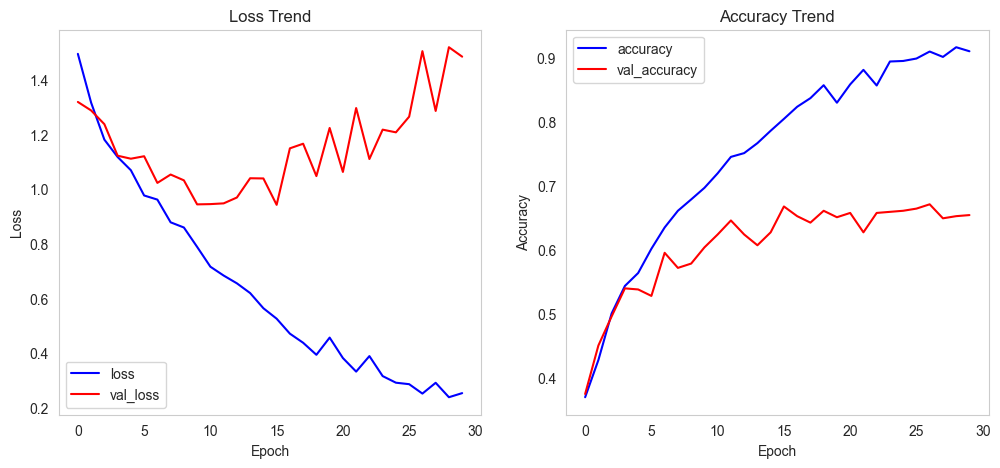

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [27]:
cnn.evaluate(x_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.7563 - loss: 1.1480


[1.3340177536010742, 0.7357142567634583]

In [28]:
pred_ys = cnn(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]), y_test[0])

tf.Tensor([7.8248987e-12 8.6605801e-12 7.5468200e-01 3.5941519e-10 2.4531803e-01], shape=(5,), dtype=float32) 2 [0. 0. 0. 0. 1.]


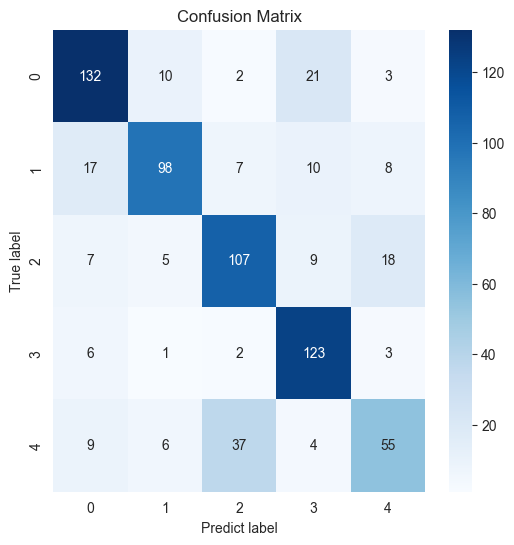

In [29]:
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel('Predict label')
plt.show()